<a class="anchor" id="TableofContents"></a>
# Table of Contents
* [1. Loading Packages](#LoadingPackages)    
* [2. Loading Data](#LoadingData)
* [3. Target Variable distribution](#TargetVariabledistribution)
* [4. Missing and Unique Values](#MissingandUniqueValues)
    * [4.1 Unique Values in Categorical Columns](#UniqueValuesinCategoricalColumns)
    * [4.2 Filling Car Age Missing Values](#FillingCarAgeMissingValues)
        * [4.2.1 Relation between Car Age and Target](#RelationbetweenCarAgeandTarget)
    * [4.3 Filling Occupation Type Missing Values](#FillingOccupationTypeMissingValues)
        * [4.3.1 Relationship Between Occupation Type and Target](#RelationshipBetweenOccupationTypeandTarget)
    * [4.4 Organisation Type Missing Values](#OrganisationTypeMissingValues)
    * [4.5 Relationship Between Gender and Target](#RelationshipBetweenGenderandTarget)
* [5. Finding Correlation](#FindingCorrelation)
* [6. Outliers](#Outliers)
    * [6.1 Fixing Days Employed Values](#FixingDaysEmployedValues)
    * [6.2 Fixing Children Count](#FixingChildrenCount)
    * [6.3 Fixing Days Birth, Days ID Publish, Days Registration](#FixingDaysBirth,DaysIDPublish,DaysRegistration)
 

<a class="anchor" id="LoadingPackages"></a>
# 1. Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[back to top](#TableofContents)

<a class="anchor" id="LoadingData"></a>
# 2. Loading Data

In [3]:
app_train_data= pd.read_csv("application_train.csv")

In [4]:
app_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Shape of training features:', app_train_data.shape)


Shape of training features: (307511, 122)


[back to top](#TableofContents)

<a class="anchor" id="TargetVariabledistribution"></a>
# 3. Target Variable distribution

In [6]:
#Majority class classifier count
target_counts=app_train_data['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

pd.concat([target_counts,target_percent],axis=1,keys=['Count','Percent'])


,Count,Percent
0,282686,91.927118
1,24825,8.072882


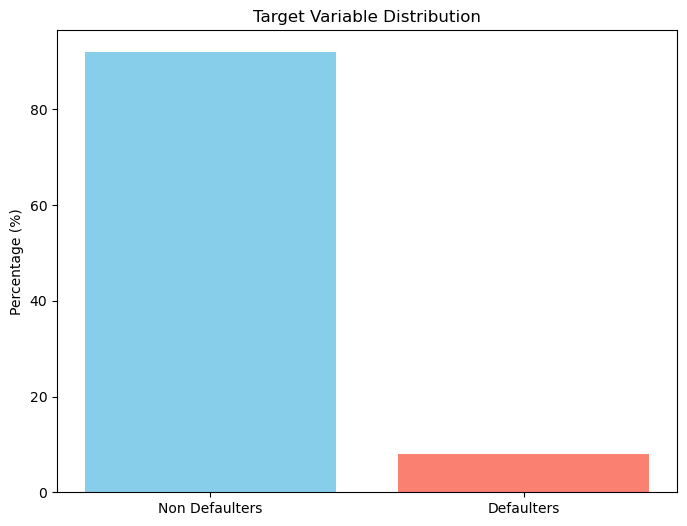

In [16]:
import matplotlib.pyplot as plt

# Sample data (replace these values with your actual data)
target_percent = [91.92, 8.07]

# Define colors for the bars
colors = ['skyblue', 'salmon']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Non Defaulters', 'Defaulters'], target_percent, color=colors)
plt.ylabel('Percentage (%)')
plt.title('Target Variable Distribution')
plt.show()




In [7]:
#accuracy be for a simple model consisting in a majority class classifier
class_counts = app_train_data['TARGET'].value_counts()
# Determine the majority class
majority_class = class_counts.idxmax()
# Calculate the proportion of the majority class in the dataset
majority_proportion = class_counts[majority_class] / len(app_train_data)
# Calculate the accuracy of the majority class classifier
accuracy = majority_proportion * 100  # Multiply by 100 to get the percentage
print("Accuracy of the majority class classifier: {:.2f}%".format(accuracy))


Accuracy of the majority class classifier: 91.93%


[back to top](#TableofContents)

<a class="anchor" id="MissingandUniqueValues"></a>
# 4. Missing and Unique Values


In [8]:
total=app_train_data.isnull().sum().sort_values(ascending=False)
percentage=(app_train_data.isnull().sum()/app_train_data.isnull().count()*100).sort_values(ascending = False)

pd.concat([total,percentage],axis=1,keys=['total','percentage'])

,total,percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


<a class="anchor" id="UniqueValuesinCategoricalColumns"></a>
## 4.1 Unique Values in Categorical Columns

In [9]:
#Unique values in each object column 
app_train_data.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<a class="anchor" id="FillingCarAgeMissingValues"></a>
## 4.2 Filling Car Age Missing Values

In [10]:
def process_own_car_age(df):
    df['OWN_CAR_AGE'].fillna(0, inplace=True)
    df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))
    return df
process_own_car_age(app_train_data)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
app_train_data['OWN_CAR_AGE'].value_counts()
#Where 0 means no car and 1,2,3 represent the binned age of the car

0    205063
3     56299
1     38027
2      8122
Name: OWN_CAR_AGE, dtype: int64

<a class="anchor" id="RelationbetweenCarAgeandTarget"></a>
### 4.2.1 Relation between Car Age and Target

<Figure size 800x600 with 0 Axes>

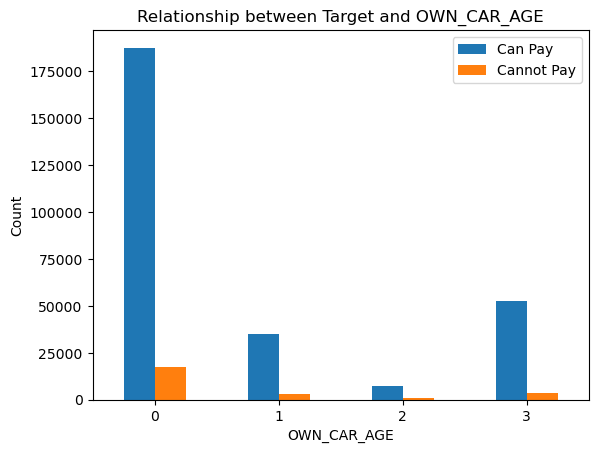

In [12]:
plt.figure(figsize=(8, 6))
ax=app_train_data.groupby(['OWN_CAR_AGE', 'TARGET']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('Count')
plt.title('Relationship between Target and OWN_CAR_AGE')
plt.legend(['Can Pay', 'Cannot Pay'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [13]:
#We can interpret that people who do not own a car/ who's car age is 0 are the one's in majority in terms of non repayment

<a class="anchor" id="FillingOccupationTypeMissingValues"></a>
## 4.3 Filling Occupation Type Missing Values 

In [14]:
app_train_data['OCCUPATION_TYPE'].isnull().sum()


96391

In [15]:
if app_train_data['OCCUPATION_TYPE'].isnull().sum() > 0:
    column_dtype = app_train_data['OCCUPATION_TYPE'].dtype
    if column_dtype == 'object':
        print("The missing values in 'OCCUPATION_TYPE' column are categorical.")
    else:
        print("The missing values in 'OCCUPATION_TYPE' column are numerical.")
else:
    print("There are no missing values in 'OCCUPATION_TYPE' column.")

The missing values in 'OCCUPATION_TYPE' column are categorical.


In [16]:
categorical_columns = ['OCCUPATION_TYPE']
for column in categorical_columns:
    if app_train_data[column].isnull().sum() > 0:
        app_train_data[column].fillna('Unknown', inplace=True)

In [17]:
app_train_data['OCCUPATION_TYPE'].value_counts()
#We can see that all the missing values have been filled with an 'Unknown' occupation type

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<a class="anchor" id="RelationshipBetweenOccupationTypeandTarget"></a>
### 4.3.1 Relationship Between Occupation Type and Target

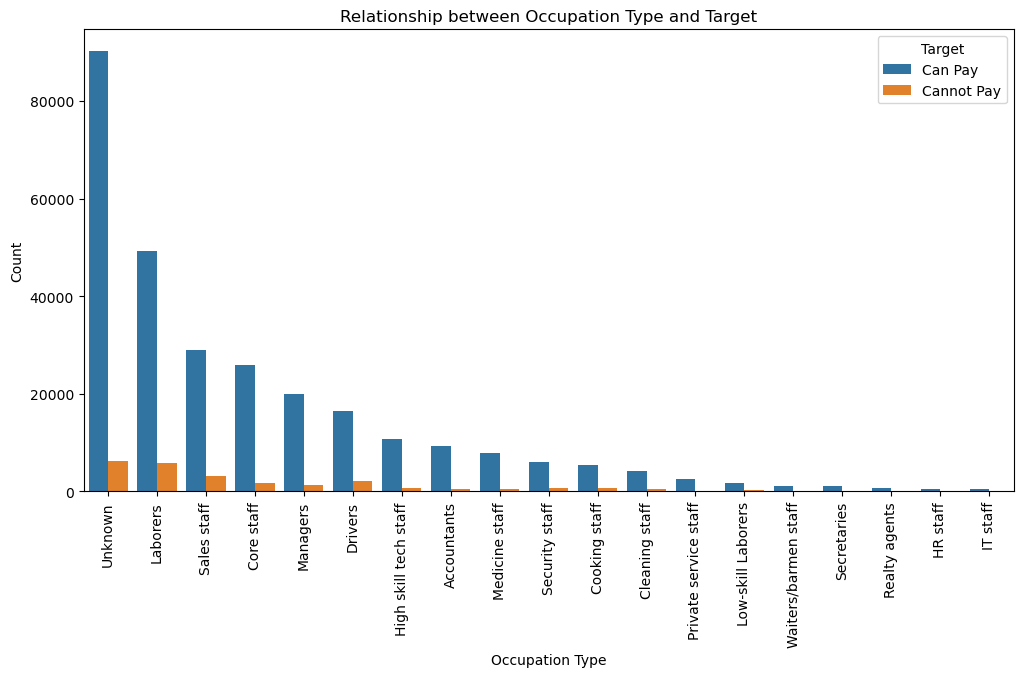

In [18]:
sorted_occupations = app_train_data['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.countplot(data=app_train_data, x='OCCUPATION_TYPE', hue='TARGET',order=sorted_occupations)
plt.xticks(rotation=90)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Relationship between Occupation Type and Target')
plt.legend(title='Target', labels=['Can Pay', 'Cannot Pay'])
plt.show()

<a class="anchor" id="OrganisationTypeMissingValues"></a>
## 4.4 Organisation Type Missing Values

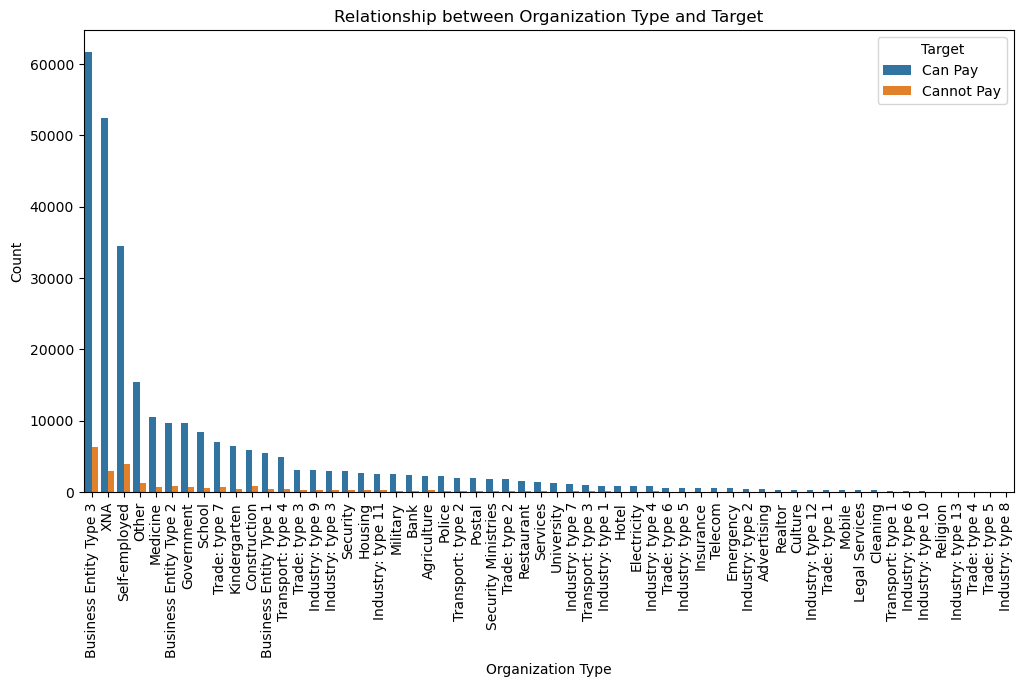

In [19]:
sorted_organizations = app_train_data['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.countplot(data=app_train_data, x='ORGANIZATION_TYPE', hue='TARGET',order=sorted_organizations)
plt.xticks(rotation=90)
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.title('Relationship between Organization Type and Target')
plt.legend(title='Target', labels=['Can Pay', 'Cannot Pay'])
plt.show()

<a class="anchor" id="RelationshipBetweenGenderandTarget"></a>
## 4.5 Relationship Between Gender and Target

In [22]:
#Dropping XNA values in Gender Column 
app_train_data["CODE_GENDER"].value_counts()
app_train_data.drop(app_train_data[app_train_data['CODE_GENDER'] == 'XNA'].index, inplace=True)

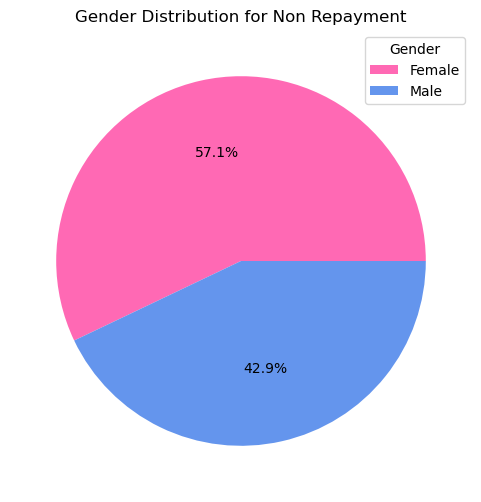

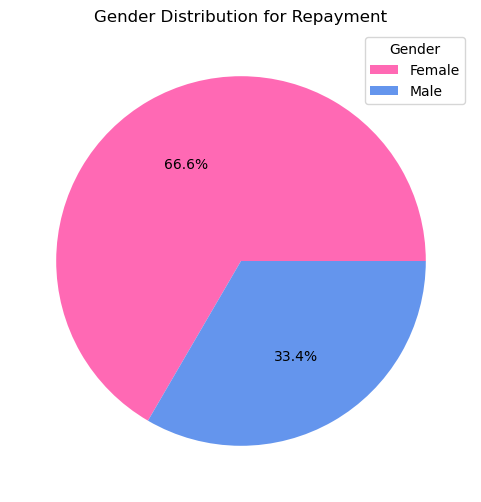

In [23]:
target_1_df = app_train_data[app_train_data['TARGET'] == 1]
target_0_df = app_train_data[app_train_data['TARGET'] == 0]

colors = ['#FF69B4', '#6495ED']
gender_counts_target_1 = target_1_df['CODE_GENDER'].value_counts()
gender_counts_target_0 = target_0_df['CODE_GENDER'].value_counts()
# Plotting the pie chart for Target=1
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_target_1, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution for Non Repayment')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Plotting the pie chart for Target=0
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_target_0, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution for Repayment')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

<a class="anchor" id="RelationshipBetweenContractTypeandTarget"></a>
## 4.6 Relationship Between Contract Type and Target

In [97]:
app_train_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

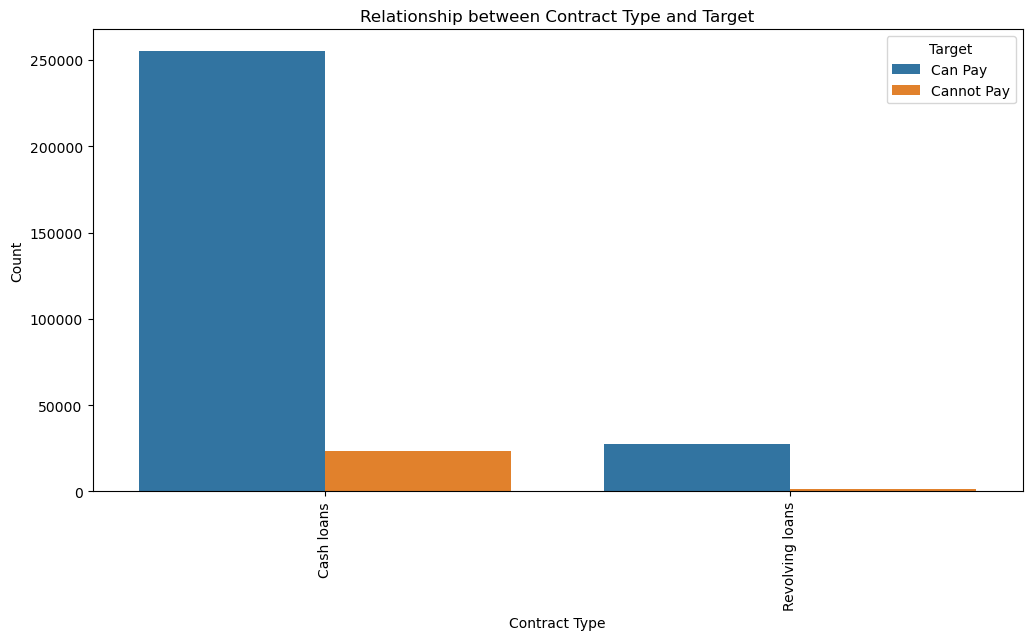

In [98]:
sorted_occupations = app_train_data['NAME_CONTRACT_TYPE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.countplot(data=app_train_data, x='NAME_CONTRACT_TYPE', hue='TARGET',order=sorted_occupations)
plt.xticks(rotation=90)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Relationship between Contract Type and Target')
plt.legend(title='Target', labels=['Can Pay', 'Cannot Pay'])
plt.show()

[back to top](#TableofContents)

<a class="anchor" id="FindingCorrelation"></a>
# 5. Finding Correlation

In [99]:
correlation_matrix = app_train_data.corr()
target_correlation = correlation_matrix['TARGET']
target_correlation_sorted = target_correlation.sort_values(ascending=False)
target_correlation_sorted.head()

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
Name: TARGET, dtype: float64

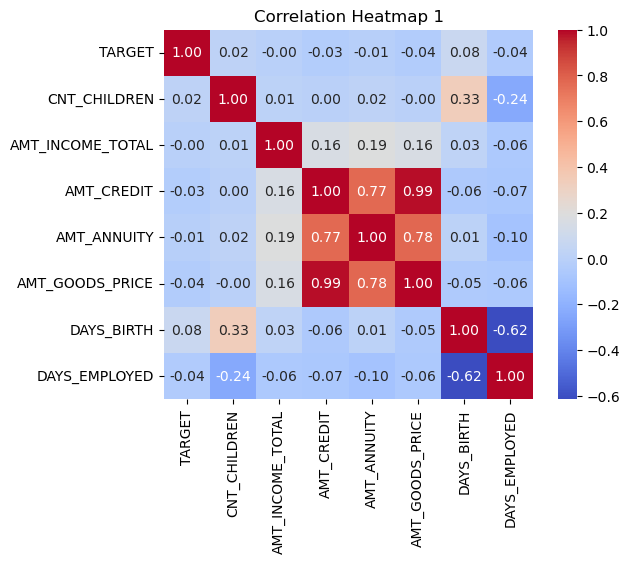

In [100]:
selected_columns = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']
subset_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Generate a heatmap using seaborn for the subset correlation matrix
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap 1')

# Display the heatmap
plt.show()

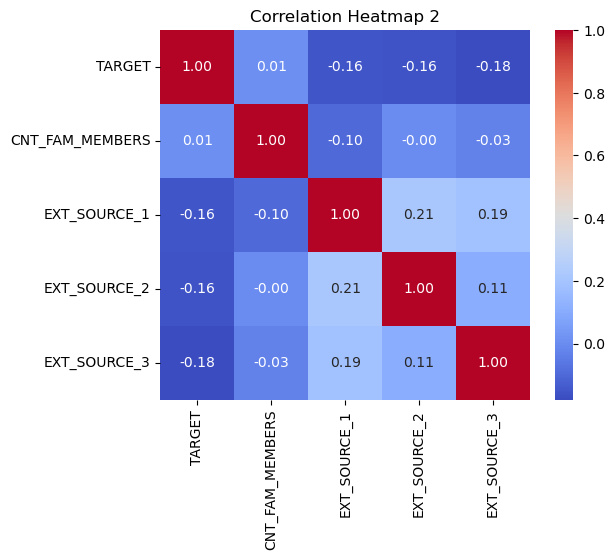

In [101]:
selected_columns = ['TARGET','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
subset_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Generate a heatmap using seaborn for the subset correlation matrix
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap 2')

# Display the heatmap
plt.show()

[back to top](#TableofContents)

<a class="anchor" id="Outliers"></a>
# 6. Outliers

In [102]:
# Selecting only numerical columns
numerical_columns = app_train_data.select_dtypes(include=[np.number])

z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

outlier_percentages = (outliers.sum() / outliers.shape[0]) * 100
print(outlier_percentages.sort_values(ascending=False))

FLAG_DOCUMENT_6            8.805539
FLAG_DOCUMENT_8            8.137595
TARGET                     8.072882
REG_CITY_NOT_LIVE_CITY     7.817281
FLAG_EMAIL                 5.671992
                             ...   
EXT_SOURCE_2               0.000000
DAYS_BIRTH                 0.000000
REG_CITY_NOT_WORK_CITY     0.000000
LIVE_CITY_NOT_WORK_CITY    0.000000
SK_ID_CURR                 0.000000
Length: 106, dtype: float64


<a class="anchor" id="FixingDaysEmployedValues"></a>
## 6.1 Fixing Days Employed Values

In [103]:
app_train_data['DAYS_EMPLOYED'].describe()
#We can see that the minimum values of days employed is negative which should not be the case. We have to fix this.
#Also, there is a repeating value 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [104]:
app_train_data['DAYS_EMPLOYED']=app_train_data['DAYS_EMPLOYED'].abs()

mean_value = app_train_data.loc[app_train_data['DAYS_EMPLOYED'] != 365243, 'DAYS_EMPLOYED'].mean()
app_train_data['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)


In [105]:
app_train_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean       2384.169325
std        2117.381973
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<a class="anchor" id="FixingChildrenCount"></a>
## 6.2 Fixing Children Count

In [106]:
app_train_data['CNT_CHILDREN'].value_counts()
#More than 7 children looks like an outlier, lets fix it!

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [107]:
outlier_threshold = 7

app_train_data['CNT_CHILDREN'] = app_train_data['CNT_CHILDREN'].where(app_train_data['CNT_CHILDREN'] <= outlier_threshold, outlier_threshold)

In [108]:
app_train_data['CNT_CHILDREN'].value_counts()

0    215371
1     61119
2     26749
3      3717
4       429
5        84
7        21
6        21
Name: CNT_CHILDREN, dtype: int64

<a class="anchor" id="FixingDaysBirth,DaysIDPublish,DaysRegistration"></a>
## 6.3 Fixing Days Birth, Days ID Publish, Days Registration

In [109]:
app_train_data['DAYS_BIRTH']=app_train_data['DAYS_BIRTH'].abs()
app_train_data['DAYS_EMPLOYED']=app_train_data['DAYS_EMPLOYED'].abs()
app_train_data['DAYS_REGISTRATION']=app_train_data['DAYS_REGISTRATION'].abs()
app_train_data['DAYS_LAST_PHONE_CHANGE']=app_train_data['DAYS_LAST_PHONE_CHANGE'].abs()


In [110]:
print(app_train_data['DAYS_BIRTH'].head())
print(app_train_data['DAYS_EMPLOYED'].head())
print(app_train_data['DAYS_REGISTRATION'].head())
print(app_train_data['DAYS_LAST_PHONE_CHANGE'].head())

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64
0     637.0
1    1188.0
2     225.0
3    3039.0
4    3038.0
Name: DAYS_EMPLOYED, dtype: float64
0    3648.0
1    1186.0
2    4260.0
3    9833.0
4    4311.0
Name: DAYS_REGISTRATION, dtype: float64
0    1134.0
1     828.0
2     815.0
3     617.0
4    1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


[back to top](#TableofContents)